# Regression Models
## Part 2 - Multiple linear regression

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sb
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')
%matplotlib inline

#### (Multiple) linear regression on the enrollment data

In [52]:
#address = r'\Data2\enrollment_forecast.csv'
address ="/content/sample_data/enrollment_forecast.csv"

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [53]:
enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    29 non-null     int64  
 1   roll    29 non-null     int64  
 2   unem    29 non-null     float64
 3   hgrad   29 non-null     int64  
 4   inc     29 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.3 KB


In [54]:
# checking the correlation matrix  range -1 to 1
# Unemployment (unem) and high_graduation(hgrad) are independent from each other
# values of unem and hgrad are close to 0 mean the are independent  and vis versa
# unem and hgrad have values close 1 with roll mean it impacts positively and they are dependent
enroll[['roll', 'unem','hgrad']].corr()



,roll,unem,hgrad
roll,1.000000,0.391344,0.890294
unem,0.391344,1.000000,0.177376
hgrad,0.890294,0.177376,1.000000


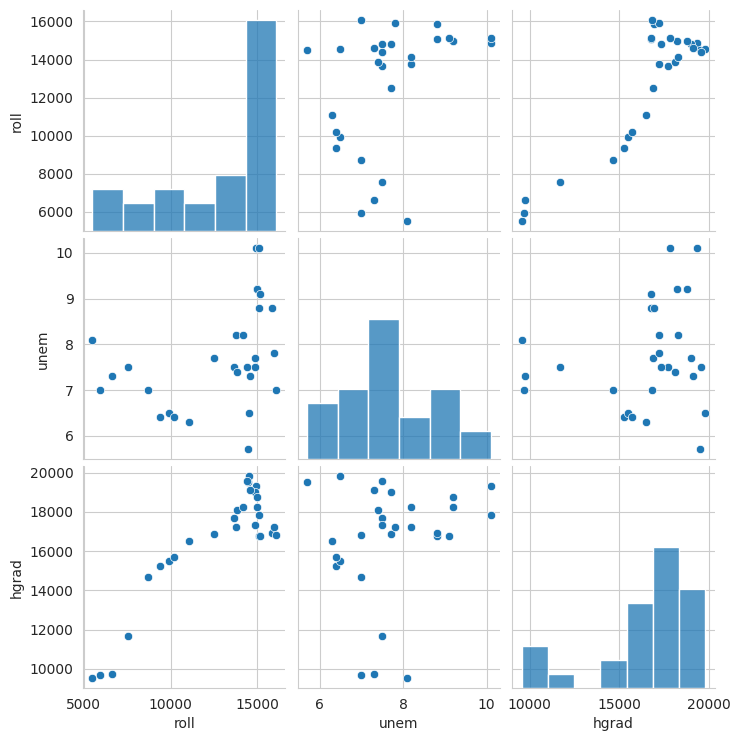

In [55]:
 sb.pairplot(enroll[['roll', 'unem', 'hgrad']])

In [56]:
print(enroll[['roll', 'unem', 'hgrad']].corr())

           roll      unem     hgrad
roll   1.000000  0.391344  0.890294
unem   0.391344  1.000000  0.177376
hgrad  0.890294  0.177376  1.000000


<Axes: >

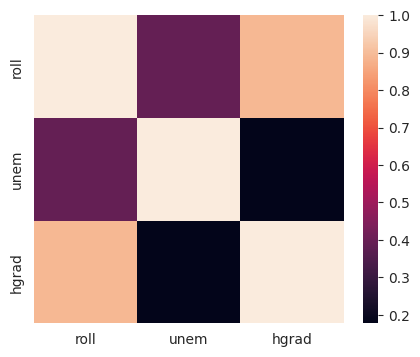

In [57]:
sb.heatmap(enroll[['roll', 'unem', 'hgrad']].corr())

In [58]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

X, y = enroll_data, enroll_target

### Checking for missing values

In [59]:
missing_values = X==np.NAN
# boolean masss
X[missing_values == True]

array([], dtype=float64)

If you don't normalize the data before fitting a linear regression model, several potential issues can arise:

  Coefficient Interpretation: The magnitudes of the coefficients can be hard to interpret if the features have different scales.

  Numerical Stability: Models can suffer from numerical stability issues when features have very different scales. This can lead to difficulties in finding the optimal parameters during the fitting process and might result in less accurate models.

In [60]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#normalize parameter is no longer available in the LinearRegression class from scikit-learn.
#Instead, you should preprocess your data using a StandardScaler
#---LinReg = LinearRegression(normalize=True)

#---LinReg.fit(X, y)

# Initialize and fit the linear regression model
LinReg = LinearRegression()
LinReg.fit(X_scaled, y)

LinearRegression()

Make test prediction

In [61]:
y_pred = LinReg.predict(X)

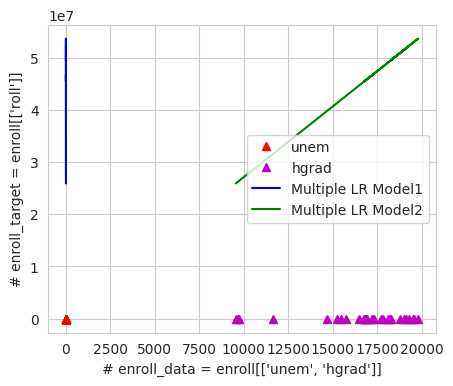

In [62]:
plt.plot(X[:,0], y, 'r^', label='unem')
plt.plot(X[:,1], y, 'm^', label='hgrad')
plt.plot(X[:,0], y_pred, 'b', label='Multiple LR Model1')
plt.plot(X[:,1], y_pred, 'g', label='Multiple LR Model2')
plt.xlabel("# enroll_data = enroll[['unem', 'hgrad']]")
plt.ylabel("# enroll_target = enroll[['roll']]")
plt.legend(loc="best")
plt.show()

In [64]:
print(LinReg.score(X_scaled, y))

0.8488812666133723
